In [1]:
import tsfresh as ts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle

In [2]:
with open('../02_Daten/Kaffeemaschine/preprocessed_coffee_scaled.pickle', 'rb') as handle:
    df = pickle.load(handle)

### DF passend für tsfresh machen

In [3]:
df.head()

,time,day_number,day_name,Status,x,y,z
0,2022-01-28 10:39:28.532,4,Freitag,0,-0.286314,0.185127,-0.094353
1,2022-01-28 10:39:28.742,4,Freitag,0,-0.224631,0.579710,0.564770
2,2022-01-28 10:39:28.915,4,Freitag,0,0.104340,1.368876,0.011101
3,2022-01-28 10:39:29.237,4,Freitag,0,-0.327435,1.095703,-0.278910
4,2022-01-28 10:39:29.455,4,Freitag,0,0.289387,1.186761,-0.331649


In [3]:
df.drop(['day_number','day_name','Status'], axis=1, inplace=True)

In [4]:
df['id'] = 1

In [6]:
df.head()

,time,x,y,z,id
0,2022-01-28 10:39:28.532,-0.286314,0.185127,-0.094353,1
1,2022-01-28 10:39:28.742,-0.224631,0.579710,0.564770,1
2,2022-01-28 10:39:28.915,0.104340,1.368876,0.011101,1
3,2022-01-28 10:39:29.237,-0.327435,1.095703,-0.278910,1
4,2022-01-28 10:39:29.455,0.289387,1.186761,-0.331649,1


## Rolling

mit größerem Datensatz probieren

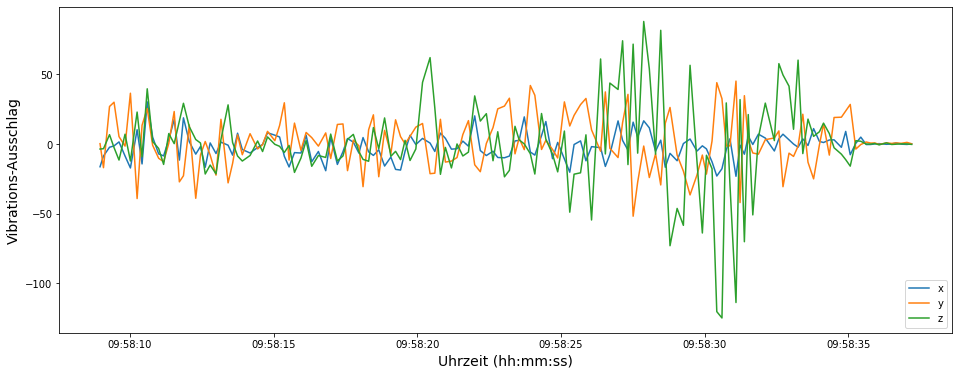

In [12]:
intersection = 1486345 - 5791
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.time[intersection-250 : intersection-100], df.x[intersection-250 : intersection-100], label="x")
ax.plot(df.time[intersection-250 : intersection-100], df.y[intersection-250 : intersection-100], label='y')
ax.plot(df.time[intersection-250 : intersection-100], df.z[intersection-250 : intersection-100], label='z')

ax.set_xlabel("Uhrzeit (hh:mm:ss)", fontsize=14)
ax.set_ylabel("Vibrations-Ausschlag", fontsize=14)

plt.legend(loc=4)

In [13]:
df_small = df[1480000-100000:1480000+100000]
#df_small = df

In [14]:
df_small

,time,x,y,z,id
1380000,2022-01-31 05:10:02.683,-0.697528,0.124422,0.485680,1
1380001,2022-01-31 05:10:02.848,-0.121828,0.306537,0.380214,1
1380002,2022-01-31 05:10:02.991,-0.039585,0.549357,-0.094353,1
1380003,2022-01-31 05:10:03.163,-0.121828,0.610063,0.274760,1
1380004,2022-01-31 05:10:03.268,-0.060146,-0.239809,0.037464,1
...,...,...,...,...,...
1579995,2022-01-31 15:00:22.910,-0.101267,0.792178,-0.094353,1
1579996,2022-01-31 15:00:23.083,-0.450799,0.792178,-0.120729,1
1579997,2022-01-31 15:00:23.225,-1.170425,-0.239809,0.327487,1
1579998,2022-01-31 15:00:23.390,-0.862014,0.367242,0.643873,1


In [15]:
df_small.time = df_small.index

c:\Users\pauls\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df_small

,time,x,y,z,id
1380000,1380000,-0.697528,0.124422,0.485680,1
1380001,1380001,-0.121828,0.306537,0.380214,1
1380002,1380002,-0.039585,0.549357,-0.094353,1
1380003,1380003,-0.121828,0.610063,0.274760,1
1380004,1380004,-0.060146,-0.239809,0.037464,1
...,...,...,...,...,...
1579995,1579995,-0.101267,0.792178,-0.094353,1
1579996,1579996,-0.450799,0.792178,-0.120729,1
1579997,1579997,-1.170425,-0.239809,0.327487,1
1579998,1579998,-0.862014,0.367242,0.643873,1


In [17]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df_small, column_id="id", column_sort="time", max_timeshift=200, rolling_direction=4) 
#rolling_direction: The absolute value decides, how much to shift at each step. -> um Zeit und Ressourcen zu sparen, immer 4 Schritte gehen

Rolling: 100%|██████████| 10/10 [06:49<00:00, 40.97s/it]


In [20]:
df_rolled

,time,x,y,z,id
0,1380000,-0.697528,0.124422,0.485680,"(1, 1380003)"
1,1380001,-0.121828,0.306537,0.380214,"(1, 1380003)"
2,1380002,-0.039585,0.549357,-0.094353,"(1, 1380003)"
3,1380003,-0.121828,0.610063,0.274760,"(1, 1380003)"
4,1380000,-0.697528,0.124422,0.485680,"(1, 1380007)"
...,...,...,...,...,...
10045045,1579995,-0.101267,0.792178,-0.094353,"(1, 1579999)"
10045046,1579996,-0.450799,0.792178,-0.120729,"(1, 1579999)"
10045047,1579997,-1.170425,-0.239809,0.327487,"(1, 1579999)"
10045048,1579998,-0.862014,0.367242,0.643873,"(1, 1579999)"


In [18]:
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
settings = MinimalFCParameters()
#settings = EfficientFCParameters()
# eine minimale Auswahl an Parametern für extract_features, um Zeit und Ressourcen zu sparen
# weitere Möglichkeit ist EfficientFCParameters(), welche Features mit hohem Rechenaufwand nicht berechnet

In [19]:
from tsfresh import extract_features
df_features = extract_features(df_rolled, column_id="id", column_sort="time", default_fc_parameters=settings, n_jobs=-1)

Feature Extraction: 100%|██████████| 10/10 [00:58<00:00,  5.82s/it]


In [21]:
df_features

x__sum_values  x__median   x__mean  x__length  \
1 1380003      -0.980768  -0.121828 -0.245192        4.0   
  1380007      -1.899854  -0.121828 -0.237482        8.0   
  1380011      -1.955390  -0.121828 -0.162949       12.0   
  1380015      -2.607186  -0.173229 -0.162949       16.0   
  1380019      -3.258983  -0.173229 -0.162949       20.0   
...                  ...        ...       ...        ...   
  1579983    -128.442411  -0.635846 -0.639017      201.0   
  1579987    -129.100354  -0.635846 -0.642290      201.0   
  1579991    -127.887270  -0.635846 -0.636255      201.0   
  1579995    -126.962037  -0.635846 -0.631652      201.0   
  1579999    -127.476056  -0.635846 -0.634209      201.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1380003               0.263306     0.069330             0.359790   
  1380007               0.238216     0.056747             0.336369   
  1380011               0.368663     0.135912             0.403069   
  1380015               0.335020     0.112238             0.372546   
  1380019               0.328393     0.107842             0.366598   
...                          ...          ...                  ...   
  1579983               0.289120     0.083590             0.701379   
  1579987               0.284710     0.081060             0.702565   
  1579991               0.284964     0.081204             0.697155   
  1579995               0.286916     0.082321             0.693761   
  1579999               0.290037     0.084121             0.697383   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1380003   -0.039585             0.697528   -0.697528  ...       1.046300   
  1380007   -0.039585             0.697528   -0.697528  ...       1.697112   
  1380011    0.638919             0.697528   -0.697528  ...       1.293311   
  1380015    0.638919             0.697528   -0.697528  ...       0.546760   
  1380019    0.638919             0.697528   -0.697528  ...      -0.305244   
...               ...                  ...         ...  ...            ...   
  1579983    0.207144             1.376032   -1.376032  ...      15.440763   
  1579987    0.207144             1.376032   -1.376032  ...      15.098014   
  1579991    0.207144             1.376032   -1.376032  ...      14.649798   
  1579995    0.207144             1.376032   -1.376032  ...      14.781628   
  1579999    0.207144             1.376032   -1.376032  ...      15.045274   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1380003   0.327487  0.261575        4.0               0.218607     0.047789   
  1380007   0.261578  0.212139        8.0               0.185935     0.034572   
  1380011   0.116561  0.107776       12.0               0.241242     0.058198   
  1380015   0.037464  0.034173       16.0               0.317328     0.100697   
  1380019  -0.028445 -0.015262       20.0               0.305884     0.093565   
...              ...       ...        ...                    ...          ...   
  1579983   0.063827  0.076820      201.0               0.377481     0.142492   
  1579987   0.063827  0.075114      201.0               0.379314     0.143879   
  1579991   0.063827  0.072885      201.0               0.378090     0.142952   
  1579995   0.063827  0.073540      201.0               0.378390     0.143179   
  1579999   0.063827  0.074852      201.0               0.376558     0.141796   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1380003             0.340897    0.485680             0.485680   -0.094353  
  1380007             0.282090    0.485680             0.485680   -0.094353  
  1380011             0.264223    0.485680             0.485680   -0.331649  
  1380015             0.319162    0.485680             0.806228   -0.806228  
  1380019             0.306264    0.485680             0.806228   -0.806228  
...                        ...         ...                  ...        

In [22]:
df_features_finite = df_features.replace([np.inf, -np.inf], np.nan)

In [23]:
df_features_col_nan = df_features_finite.dropna(axis=1, how='all')

In [24]:
df_features_col_nan

x__sum_values  x__median   x__mean  x__length  \
1 1380003      -0.980768  -0.121828 -0.245192        4.0   
  1380007      -1.899854  -0.121828 -0.237482        8.0   
  1380011      -1.955390  -0.121828 -0.162949       12.0   
  1380015      -2.607186  -0.173229 -0.162949       16.0   
  1380019      -3.258983  -0.173229 -0.162949       20.0   
...                  ...        ...       ...        ...   
  1579983    -128.442411  -0.635846 -0.639017      201.0   
  1579987    -129.100354  -0.635846 -0.642290      201.0   
  1579991    -127.887270  -0.635846 -0.636255      201.0   
  1579995    -126.962037  -0.635846 -0.631652      201.0   
  1579999    -127.476056  -0.635846 -0.634209      201.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1380003               0.263306     0.069330             0.359790   
  1380007               0.238216     0.056747             0.336369   
  1380011               0.368663     0.135912             0.403069   
  1380015               0.335020     0.112238             0.372546   
  1380019               0.328393     0.107842             0.366598   
...                          ...          ...                  ...   
  1579983               0.289120     0.083590             0.701379   
  1579987               0.284710     0.081060             0.702565   
  1579991               0.284964     0.081204             0.697155   
  1579995               0.286916     0.082321             0.693761   
  1579999               0.290037     0.084121             0.697383   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1380003   -0.039585             0.697528   -0.697528  ...       1.046300   
  1380007   -0.039585             0.697528   -0.697528  ...       1.697112   
  1380011    0.638919             0.697528   -0.697528  ...       1.293311   
  1380015    0.638919             0.697528   -0.697528  ...       0.546760   
  1380019    0.638919             0.697528   -0.697528  ...      -0.305244   
...               ...                  ...         ...  ...            ...   
  1579983    0.207144             1.376032   -1.376032  ...      15.440763   
  1579987    0.207144             1.376032   -1.376032  ...      15.098014   
  1579991    0.207144             1.376032   -1.376032  ...      14.649798   
  1579995    0.207144             1.376032   -1.376032  ...      14.781628   
  1579999    0.207144             1.376032   -1.376032  ...      15.045274   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1380003   0.327487  0.261575        4.0               0.218607     0.047789   
  1380007   0.261578  0.212139        8.0               0.185935     0.034572   
  1380011   0.116561  0.107776       12.0               0.241242     0.058198   
  1380015   0.037464  0.034173       16.0               0.317328     0.100697   
  1380019  -0.028445 -0.015262       20.0               0.305884     0.093565   
...              ...       ...        ...                    ...          ...   
  1579983   0.063827  0.076820      201.0               0.377481     0.142492   
  1579987   0.063827  0.075114      201.0               0.379314     0.143879   
  1579991   0.063827  0.072885      201.0               0.378090     0.142952   
  1579995   0.063827  0.073540      201.0               0.378390     0.143179   
  1579999   0.063827  0.074852      201.0               0.376558     0.141796   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1380003             0.340897    0.485680             0.485680   -0.094353  
  1380007             0.282090    0.485680             0.485680   -0.094353  
  1380011             0.264223    0.485680             0.485680   -0.331649  
  1380015             0.319162    0.485680             0.806228   -0.806228  
  1380019             0.306264    0.485680             0.806228   -0.806228  
...                        ...         ...                  ...        

In [25]:
df_features_interpolate = df_features_col_nan.interpolate(method ='linear', limit_direction ='backward')

In [26]:
np.any(np.isnan(df_features_interpolate))

False

In [27]:
df_features_interpolate_forward = df_features_interpolate.interpolate(method ='linear', limit_direction ='forward')

In [28]:
np.any(np.isnan(df_features_interpolate_forward))

False

In [29]:
df_features_interpolate_forward

x__sum_values  x__median   x__mean  x__length  \
1 1380003      -0.980768  -0.121828 -0.245192        4.0   
  1380007      -1.899854  -0.121828 -0.237482        8.0   
  1380011      -1.955390  -0.121828 -0.162949       12.0   
  1380015      -2.607186  -0.173229 -0.162949       16.0   
  1380019      -3.258983  -0.173229 -0.162949       20.0   
...                  ...        ...       ...        ...   
  1579983    -128.442411  -0.635846 -0.639017      201.0   
  1579987    -129.100354  -0.635846 -0.642290      201.0   
  1579991    -127.887270  -0.635846 -0.636255      201.0   
  1579995    -126.962037  -0.635846 -0.631652      201.0   
  1579999    -127.476056  -0.635846 -0.634209      201.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1380003               0.263306     0.069330             0.359790   
  1380007               0.238216     0.056747             0.336369   
  1380011               0.368663     0.135912             0.403069   
  1380015               0.335020     0.112238             0.372546   
  1380019               0.328393     0.107842             0.366598   
...                          ...          ...                  ...   
  1579983               0.289120     0.083590             0.701379   
  1579987               0.284710     0.081060             0.702565   
  1579991               0.284964     0.081204             0.697155   
  1579995               0.286916     0.082321             0.693761   
  1579999               0.290037     0.084121             0.697383   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1380003   -0.039585             0.697528   -0.697528  ...       1.046300   
  1380007   -0.039585             0.697528   -0.697528  ...       1.697112   
  1380011    0.638919             0.697528   -0.697528  ...       1.293311   
  1380015    0.638919             0.697528   -0.697528  ...       0.546760   
  1380019    0.638919             0.697528   -0.697528  ...      -0.305244   
...               ...                  ...         ...  ...            ...   
  1579983    0.207144             1.376032   -1.376032  ...      15.440763   
  1579987    0.207144             1.376032   -1.376032  ...      15.098014   
  1579991    0.207144             1.376032   -1.376032  ...      14.649798   
  1579995    0.207144             1.376032   -1.376032  ...      14.781628   
  1579999    0.207144             1.376032   -1.376032  ...      15.045274   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1380003   0.327487  0.261575        4.0               0.218607     0.047789   
  1380007   0.261578  0.212139        8.0               0.185935     0.034572   
  1380011   0.116561  0.107776       12.0               0.241242     0.058198   
  1380015   0.037464  0.034173       16.0               0.317328     0.100697   
  1380019  -0.028445 -0.015262       20.0               0.305884     0.093565   
...              ...       ...        ...                    ...          ...   
  1579983   0.063827  0.076820      201.0               0.377481     0.142492   
  1579987   0.063827  0.075114      201.0               0.379314     0.143879   
  1579991   0.063827  0.072885      201.0               0.378090     0.142952   
  1579995   0.063827  0.073540      201.0               0.378390     0.143179   
  1579999   0.063827  0.074852      201.0               0.376558     0.141796   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1380003             0.340897    0.485680             0.485680   -0.094353  
  1380007             0.282090    0.485680             0.485680   -0.094353  
  1380011             0.264223    0.485680             0.485680   -0.331649  
  1380015             0.319162    0.485680             0.806228   -0.806228  
  1380019             0.306264    0.485680             0.806228   -0.806228  
...                        ...         ...                  ...        

In [30]:
df_features_interpolate_forward_rounded = df_features_interpolate_forward.round(6)

In [31]:
df_features_interpolate_forward_rounded

x__sum_values  x__median   x__mean  x__length  \
1 1380003      -0.980768  -0.121828 -0.245192        4.0   
  1380007      -1.899854  -0.121828 -0.237482        8.0   
  1380011      -1.955390  -0.121828 -0.162949       12.0   
  1380015      -2.607186  -0.173229 -0.162949       16.0   
  1380019      -3.258983  -0.173229 -0.162949       20.0   
...                  ...        ...       ...        ...   
  1579983    -128.442411  -0.635846 -0.639017      201.0   
  1579987    -129.100354  -0.635846 -0.642290      201.0   
  1579991    -127.887270  -0.635846 -0.636255      201.0   
  1579995    -126.962037  -0.635846 -0.631652      201.0   
  1579999    -127.476056  -0.635846 -0.634209      201.0   

           x__standard_deviation  x__variance  x__root_mean_square  \
1 1380003               0.263306     0.069330             0.359790   
  1380007               0.238216     0.056747             0.336369   
  1380011               0.368663     0.135912             0.403069   
  1380015               0.335020     0.112238             0.372546   
  1380019               0.328393     0.107842             0.366598   
...                          ...          ...                  ...   
  1579983               0.289120     0.083590             0.701379   
  1579987               0.284710     0.081060             0.702565   
  1579991               0.284964     0.081204             0.697155   
  1579995               0.286916     0.082321             0.693761   
  1579999               0.290037     0.084121             0.697383   

           x__maximum  x__absolute_maximum  x__minimum  ...  z__sum_values  \
1 1380003   -0.039585             0.697528   -0.697528  ...       1.046300   
  1380007   -0.039585             0.697528   -0.697528  ...       1.697112   
  1380011    0.638919             0.697528   -0.697528  ...       1.293311   
  1380015    0.638919             0.697528   -0.697528  ...       0.546760   
  1380019    0.638919             0.697528   -0.697528  ...      -0.305244   
...               ...                  ...         ...  ...            ...   
  1579983    0.207144             1.376032   -1.376032  ...      15.440763   
  1579987    0.207144             1.376032   -1.376032  ...      15.098014   
  1579991    0.207144             1.376032   -1.376032  ...      14.649798   
  1579995    0.207144             1.376032   -1.376032  ...      14.781628   
  1579999    0.207144             1.376032   -1.376032  ...      15.045274   

           z__median   z__mean  z__length  z__standard_deviation  z__variance  \
1 1380003   0.327487  0.261575        4.0               0.218607     0.047789   
  1380007   0.261578  0.212139        8.0               0.185935     0.034572   
  1380011   0.116561  0.107776       12.0               0.241242     0.058198   
  1380015   0.037464  0.034173       16.0               0.317328     0.100697   
  1380019  -0.028445 -0.015262       20.0               0.305884     0.093565   
...              ...       ...        ...                    ...          ...   
  1579983   0.063827  0.076820      201.0               0.377481     0.142492   
  1579987   0.063827  0.075114      201.0               0.379314     0.143879   
  1579991   0.063827  0.072885      201.0               0.378090     0.142952   
  1579995   0.063827  0.073540      201.0               0.378390     0.143179   
  1579999   0.063827  0.074852      201.0               0.376558     0.141796   

           z__root_mean_square  z__maximum  z__absolute_maximum  z__minimum  
1 1380003             0.340897    0.485680             0.485680   -0.094353  
  1380007             0.282090    0.485680             0.485680   -0.094353  
  1380011             0.264223    0.485680             0.485680   -0.331649  
  1380015             0.319162    0.485680             0.806228   -0.806228  
  1380019             0.306264    0.485680             0.806228   -0.806228  
...                        ...         ...                  ...        

In [32]:
df_features_interpolate_forward_rounded.reset_index(inplace=True, drop=True)

In [33]:
df_features_interpolate_forward_rounded

,x__sum_values,x__median,x__mean,x__length,x__standard_deviation,x__variance,x__root_mean_square,x__maximum,x__absolute_maximum,x__minimum,...,z__sum_values,z__median,z__mean,z__length,z__standard_deviation,z__variance,z__root_mean_square,z__maximum,z__absolute_maximum,z__minimum
0,-0.980768,-0.121828,-0.245192,4.0,0.263306,0.069330,0.359790,-0.039585,0.697528,-0.697528,...,1.046300,0.327487,0.261575,4.0,0.218607,0.047789,0.340897,0.485680,0.485680,-0.094353
1,-1.899854,-0.121828,-0.237482,8.0,0.238216,0.056747,0.336369,-0.039585,0.697528,-0.697528,...,1.697112,0.261578,0.212139,8.0,0.185935,0.034572,0.282090,0.485680,0.485680,-0.094353
2,-1.955390,-0.121828,-0.162949,12.0,0.368663,0.135912,0.403069,0.638919,0.697528,-0.697528,...,1.293311,0.116561,0.107776,12.0,0.241242,0.058198,0.264223,0.485680,0.485680,-0.331649
3,-2.607186,-0.173229,-0.162949,16.0,0.335020,0.112238,0.372546,0.638919,0.697528,-0.697528,...,0.546760,0.037464,0.034173,16.0,0.317328,0.100697,0.319162,0.485680,0.806228,-0.806228
4,-3.258983,-0.173229,-0.162949,20.0,0.328393,0.107842,0.366598,0.638919,0.697528,-0.697528,...,-0.305244,-0.028445,-0.015262,20.0,0.305884,0.093565,0.306264,0.485680,0.806228,-0.806228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-128.442411,-0.635846,-0.639017,201.0,0.289120,0.083590,0.701379,0.207144,1.376032,-1.376032,...,15.440763,0.063827,0.076820,201.0,0.377481,0.142492,0.385219,1.408463,1.408463,-0.990785
49996,-129.100354,-0.635846,-0.642290,201.0,0.284710,0.081060,0.702565,0.207144,1.376032,-1.376032,...,15.098014,0.063827,0.075114,201.0,0.379314,0.143879,0.386679,1.408463,1.408463,-0.990785
49997,-127.887270,-0.635846,-0.636255,201.0,0.284964,0.081204,0.697155,0.207144,1.376032,-1.376032,...,14.649798,0.063827,0.072885,201.0,0.378090,0.142952,0.385051,1.408463,1.408463,-0.990785
49998,-126.962037,-0.635846,-0.631652,201.0,0.286916,0.082321,0.693761,0.207144,1.376032,-1.376032,...,14.781628,0.063827,0.073540,201.0,0.378390,0.143179,0.385470,1.408463,1.408463,-0.990785


In [34]:
np.all(np.isfinite(df_features_interpolate_forward_rounded))

True

In [35]:
df_features_interpolate_forward_rounded.loc[50]

x__sum_values            -16.694853
x__median                 -0.101267
x__mean                   -0.083059
x__length                201.000000
x__standard_deviation      0.321105
x__variance                0.103108
x__root_mean_square        0.331673
x__maximum                 1.173498
x__absolute_maximum        1.173498
x__minimum                -0.903135
y__sum_values             61.371117
y__median                  0.336890
y__mean                    0.305329
y__length                201.000000
y__standard_deviation      0.399803
y__variance                0.159842
y__root_mean_square        0.503059
y__maximum                 1.186761
y__absolute_maximum        1.186761
y__minimum                -0.786155
z__sum_values              0.438857
z__median                 -0.015263
z__mean                    0.002183
z__length                201.000000
z__standard_deviation      0.420568
z__variance                0.176878
z__root_mean_square        0.420574
z__maximum                 1

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(df_features_interpolate_forward_rounded)

In [37]:
labels = kmeans.labels_

In [38]:
kmeans.cluster_centers_

array([[ 4.64510128e+00,  1.80836995e-02,  2.31099540e-02,
         2.01000000e+02,  5.17597193e-01,  1.46215959e+00,
         5.19658420e-01,  1.65983295e+00,  1.88223315e+00,
        -1.66187031e+00, -7.99511854e+01, -3.71935658e-01,
        -3.97767085e-01,  2.01000000e+02,  8.38521215e-01,
         5.52984503e+00,  9.91919125e-01,  2.32696041e+00,
         3.51306996e+00, -3.27993534e+00,  2.16422439e+01,
         8.33066804e-02,  1.07672856e-01,  2.01000000e+02,
         8.10084665e-01,  6.22165387e+00,  8.22000278e-01,
         3.27730953e+00,  3.59139419e+00, -2.78947194e+00],
       [-1.04164037e+01, -5.63546278e-02, -5.19894089e-02,
         2.00761204e+02,  3.28380865e-01,  1.28127122e-01,
         3.38470842e-01,  9.07742111e-01,  1.07533149e+00,
        -1.01214817e+00,  6.14913509e+01,  3.11767317e-01,
         3.06289391e-01,  2.00761204e+02,  4.52562301e-01,
         3.20094912e-01,  5.55392284e-01,  1.63973879e+00,
         1.66550344e+00, -1.04694039e+00, -7.98430427e-

In [39]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [40]:
vals = dict(zip(unique, counts))

In [41]:
vals

{0: 9933, 1: 20722, 2: 5691, 3: 13654}

In [ ]:
''' noch rausfinden:
Welche Zahl steht für welchen Status?
Wird Zeitfolge beachtet? -> Kommen gleiche Zahlen hintereinander vor (sollte so sein)?
Plotten oder Ähnliches
'''

In [42]:
len(labels)

50000

In [43]:
len(df_small)

200000

In [44]:
x = np.arange(50000)

In [45]:
len(x)

50000

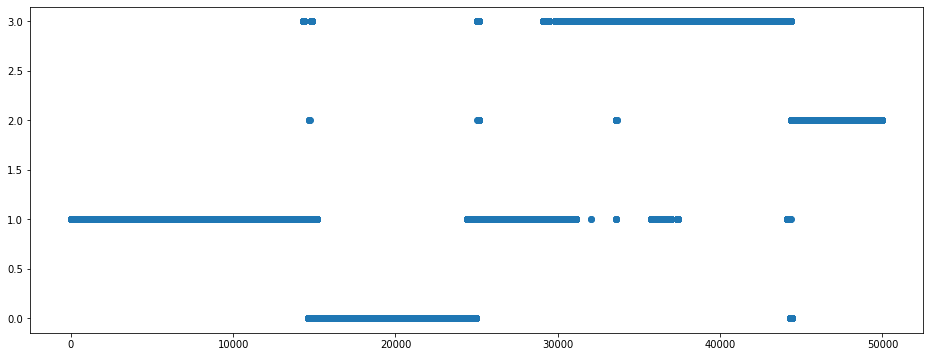

In [46]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(x, labels)

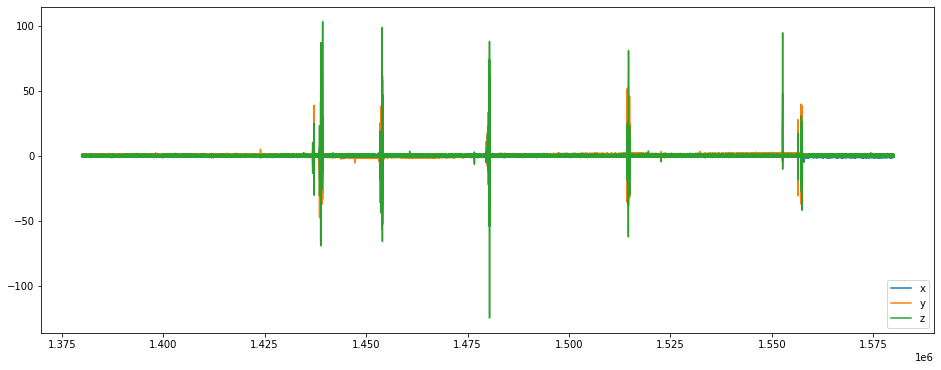

In [48]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df_small.time, df_small.x, label='x')
ax.plot(df_small.time, df_small.y, label='y')
ax.plot(df_small.time, df_small.z, label='z')

plt.legend(loc=4)